In [103]:
# импорт библиотек
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

# Анализ данных о продажах продуктов в интернет-магазине

In [26]:
# чтение данных
d=pd.read_csv('data.csv',encoding= 'unicode_escape')
d.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Описание данных 

Датасет (https://www.kaggle.com/datasets/carrie1/ecommerce-data) содержит данные о продаже товаров в период с 01/12/2010 по 09/12/2011. Компания-продавец специализируется на продаже подарков и сотрудничает преимущественно с оптовиками.

Доступные столбцы:

- InvoiceNo: номер заказа
- StockCode: код товара
- Descriprtion: описание товара
- Quantity: количество
- InvoiceDate: дата заказа
- UnitPrice: цена за единицу товара
- CustomerID: идентификатор покупателя
- Country: страна покупателя

In [30]:
# информация о столбцах датасета
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [31]:
#основные статистики для числовых данных
d.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Отрицательные значения количества (Quantity) и цены (UnitPrice) недопустимы.

In [32]:
#основные статистики для категориальных данных
d.describe(include=[object])

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [33]:
# изначальный размер датасета (количество объектов)
d_size=d.shape[0]
d_size

541909

## Подготовка датасета 

### Очистка от дублирующих строк

In [34]:
# поиск дубликатов, совпадающих по всем столбцам
duplicates = d[d.duplicated(keep=False)]

# выведе таблицу с дублями (для удобства проверки сортируем, чтобы дубли из одной группы шли друг за другом)
duplicates_sort = duplicates.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])
duplicates_sort

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
440149,C574510,22360,GLASS JAR ENGLISH CONFECTIONERY,-1,11/4/2011 13:25,2.95,15110.0,United Kingdom
461407,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,11/13/2011 11:38,0.55,17838.0,United Kingdom
461408,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,11/13/2011 11:38,0.55,17838.0,United Kingdom
529980,C580764,22667,RECIPE BOX RETROSPOT,-12,12/6/2011 10:38,2.95,14562.0,United Kingdom


In [35]:
#При удалении дублей необходимо удалить строк:
d.duplicated().sum()

5268

In [37]:
# удаляем дубликаты, оставляем только одну строку из дублирующих
d.drop_duplicates(inplace=True)
d

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [38]:
# Проверяем размер датасета после удаления дублей
d_size-d.shape[0]

5268

### Очистка от выбросов

In [39]:
# Найдём строки, где наблюдаются отрицательные значения количества или цены товара
outliers=d[(d['Quantity'] <=0) | (d['UnitPrice'] <=0) ]
outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [40]:
# Проанализируем какую часть такие данные составляют от исходного датасета
print(f'Процент данных с выбросами = {round((outliers.shape[0]/d.shape[0])*100,2)} %')

Процент данных с выбросами = 2.19 %


In [41]:
# Так как процент данных с выбросами мал, удаляем их
d.drop(outliers.index, axis=0, inplace=True, errors = 'ignore')
d

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [42]:
#Оценим отсортированные данные по количеству товаров
d_sort_quantity=d.sort_values(by='Quantity', ascending=False)
d_sort_quantity.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/2011 12:26,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,5/27/2011 10:52,0.72,13135.0,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2/22/2011 10:43,0.82,18087.0,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,7/19/2011 17:04,0.06,14609.0,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,1/11/2011 12:55,2.10,15749.0,United Kingdom
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,4/18/2011 13:20,2.10,15749.0,United Kingdom
433788,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,11/2/2011 11:24,0.32,16308.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,12/2/2010 17:38,0.18,16754.0,United Kingdom


In [44]:
# исключим экстремальные значения чтобы не искажать общую картину данных
outliers2=d[(d['Quantity'] > 4800)]
d.drop(outliers2.index, axis=0, inplace=True, errors = 'ignore')

In [45]:
#Оценим отсортированные данные по стоимости
d_sort_price=d.sort_values(by='UnitPrice', ascending=False)
d_sort_price.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15017,537632,AMAZONFEE,AMAZON FEE,1,12/7/2010 15:08,13541.33,NaN,United Kingdom
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,NaN,United Kingdom
173382,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.75,16029.0,United Kingdom
297723,562955,DOT,DOTCOM POSTAGE,1,8/11/2011 10:14,4505.17,NaN,United Kingdom
268028,560373,M,Manual,1,7/18/2011 12:30,4287.63,NaN,United Kingdom
422351,573077,M,Manual,1,10/27/2011 14:13,4161.06,12536.0,France
422376,573080,M,Manual,1,10/27/2011 14:20,4161.06,12536.0,France
406406,571751,M,Manual,1,10/19/2011 11:18,3949.32,12744.0,Singapore
374542,569382,M,Manual,1,10/3/2011 16:44,3155.95,15502.0,United Kingdom
347948,567353,M,Manual,1,9/19/2011 16:14,2653.95,NaN,Hong Kong


In [46]:
# Оставляем все данные, так как экстремальных значений нет

In [48]:
# Проверка, что номер заказа всегда содержит цифры
Literal_invoiceNo = d[d['InvoiceNo'].str.isalpha()]
Literal_invoiceNo

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [49]:
# Литеральный код товара описывает затраты на пересылку, инструкции. В общем, имеет смысл. Оставляем.
Literal_StockCode = d[d['StockCode'].str.isalpha()]
Literal_StockCode

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583.0,France
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.00,12662.0,Germany
1814,536544,DOT,DOTCOM POSTAGE,1,12/1/2010 14:32,569.77,NaN,United Kingdom
2239,536569,M,Manual,1,12/1/2010 15:35,1.25,16274.0,United Kingdom
...,...,...,...,...,...,...,...,...
541216,581494,POST,POSTAGE,2,12/9/2011 10:13,18.00,12518.0,Germany
541540,581498,DOT,DOTCOM POSTAGE,1,12/9/2011 10:26,1714.17,NaN,United Kingdom
541730,581570,POST,POSTAGE,1,12/9/2011 11:59,18.00,12662.0,Germany
541767,581574,POST,POSTAGE,2,12/9/2011 12:09,18.00,12526.0,Germany


### Обработка пропусков 


In [50]:
# выявим количество пропущенных значений в данных 
missing_data = d.isnull().sum()
missing_data

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132186
Country             0
dtype: int64

Пропуски присутвуют только в колонке с id пользователя

In [51]:
print(f'Процентное соотношение пропусков для CustomerID = {round((missing_data.CustomerID/ d.shape[0]) * 100,2)}%')

Процентное соотношение пропусков для CustomerID = 25.18%


Пропустки в данных составляют 1/4 от датасета. Удаления такого количества данных значительно уменьшает выборку. Однако, для выполнения целей данного проекта - исследования факторов, влияющих на продажи продуктов в интернет-магазине - знание об ID пользователя не несёт большой ценности. Значительно информативнее понимать сам факт наличия заказа, страну пользователя.

По этой причине, пропуски в данных заполняем значением 0.

In [52]:
# Заполняем пропуски
d['CustomerID'].fillna(0, inplace=True)
d[d['CustomerID']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,0.0,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,0.0,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,0.0,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,0.0,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,0.0,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,0.0,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,0.0,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,0.0,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,0.0,United Kingdom


### Изменение формата столбцов данных 

In [17]:
# Изменяем тип данных
d['InvoiceDate'] = pd.to_datetime(d['InvoiceDate'])
d['CustomerID'] = d.CustomerID.astype(object) 

In [53]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524876 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    524876 non-null  object 
 1   StockCode    524876 non-null  object 
 2   Description  524876 non-null  object 
 3   Quantity     524876 non-null  int64  
 4   InvoiceDate  524876 non-null  object 
 5   UnitPrice    524876 non-null  float64
 6   CustomerID   524876 non-null  float64
 7   Country      524876 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.0+ MB


Изменим:

- InvoiceDate: object-> datetime;
- CustomerID: float->object

In [54]:
# Изменяем тип данных
d['InvoiceDate'] = pd.to_datetime(d['InvoiceDate'])
d['CustomerID'] = d.CustomerID.astype(object) 

In [55]:
# Проверяем форматы данных
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524876 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524876 non-null  object        
 1   StockCode    524876 non-null  object        
 2   Description  524876 non-null  object        
 3   Quantity     524876 non-null  int64         
 4   InvoiceDate  524876 non-null  datetime64[ns]
 5   UnitPrice    524876 non-null  float64       
 6   CustomerID   524876 non-null  object        
 7   Country      524876 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.0+ MB


In [56]:
# добавим дополнительные столбцы с датой и временем отдельно
d['InvoiceD']=d['InvoiceDate'].dt.date

d['InvoiceT']=d['InvoiceDate'].dt.time

d

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceD,InvoiceT
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12:50:00


In [57]:
# конечная проверка форматов данных
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524876 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524876 non-null  object        
 1   StockCode    524876 non-null  object        
 2   Description  524876 non-null  object        
 3   Quantity     524876 non-null  int64         
 4   InvoiceDate  524876 non-null  datetime64[ns]
 5   UnitPrice    524876 non-null  float64       
 6   CustomerID   524876 non-null  object        
 7   Country      524876 non-null  object        
 8   InvoiceD     524876 non-null  object        
 9   InvoiceT     524876 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 44.0+ MB


In [58]:
# сохранение конечного датасета
d.to_csv('data_cleaned.csv')

# SQL

## Подключение к БД

In [59]:
!pip install sqlalchemy 

In [60]:
!pip3 install ipython-sql

In [61]:
# Импорт sql библиотеки
import sqlalchemy
from sqlalchemy import create_engine, text 
 
#Cоздаём ссылку на БД
engine = create_engine('sqlite://',
                       echo=False)

 
# преобразуем dataframe в БД
d.to_sql('Shop', con=engine, if_exists='replace')

524876

In [62]:
# Создаём подключение
conn = engine.connect()

## SQL запросы 

1.Выведите список всех категорий продуктов в базе данных

In [63]:
query1 = text(f'''

SELECT DISTINCT StockCode, Description 
FROM Shop;
''')

result1=pd.read_sql(query1, con=conn)
result1

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
4155,85179a,GREEN BITTY LIGHT CHAIN
4156,23617,SET 10 CARDS SWIRLY XMAS TREE 17104
4157,90214U,"LETTER ""U"" BLING KEY RING"
4158,47591b,SCOTTIES CHILDRENS APRON


2.Выведите количество проданных продуктов в каждом месяце, отсортированное по убыванию.

In [64]:
query2=text(f'''

SELECT strftime('%m', InvoiceDate) as Month, SUM(Quantity) as Total_quantity
FROM Shop
GROUP BY Month
ORDER BY Total_quantity DESC;
''')
result2=pd.read_sql(query2, con=conn )
result2

,Month,Total_quantity
0,11,751377
1,10,621029
2,12,590636
3,09,569573
4,08,421020
5,07,399693
6,05,395001
7,06,388511
8,03,376599
9,01,312884


3. Выведите топ 10 самых продаваемых продуктов по количеству проданных единиц.

In [67]:
query3=text(f'''

SELECT StockCode, Description, SUM(Quantity) as Total_quantity
FROM Shop
GROUP BY StockCode
ORDER BY Total_quantity DESC
LIMIT 10;
''')
result3=pd.read_sql(query3, con=conn )
result3

,StockCode,Description,Total_quantity
0,22197,SMALL POPCORN HOLDER,56898
1,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951
2,85099B,JUMBO BAG RED RETROSPOT,48371
3,85123A,WHITE HANGING HEART T-LIGHT HOLDER,37641
4,21212,PACK OF 72 RETROSPOT CAKE CASES,36396
5,84879,ASSORTED COLOUR BIRD ORNAMENT,36362
6,23084,RABBIT NIGHT LIGHT,30739
7,22492,MINI PAINT SET VINTAGE,26633
8,22616,PACK OF 12 LONDON TISSUES,26119
9,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24820


4. Выведите информацию о продажах продуктов в определенном регионе (пользователь вводит регион). 

In [68]:
C=input('Введите страну:')

Введите страну:France


In [69]:
query4=text(f'''

SELECT StockCode, 
    Description, 
    Quantity, 
    InvoiceDate, 
    UnitPrice, 
    CustomerID
FROM Shop
WHERE Country = '{C}';
''')

result4=pd.read_sql(query4, con=conn )
result4

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00.000000,3.75,12583.0
1,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00.000000,3.75,12583.0
2,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00.000000,3.75,12583.0
3,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00.000000,0.85,12583.0
4,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00.000000,0.65,12583.0
...,...,...,...,...,...,...
8387,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00.000000,0.85,12680.0
8388,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00.000000,2.10,12680.0
8389,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00.000000,4.15,12680.0
8390,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00.000000,4.15,12680.0


5. Выведите cуммарную стоимость по каждому заказу

In [70]:
query5=text(f'''

SELECT DISTINCT InvoiceNo, SUM(Quantity*UnitPrice) OVER(PARTITION BY InvoiceNo) AS Invoice_price
FROM Shop
ORDER BY Invoice_price;
''')
result5=pd.read_sql(query5, con=conn )
result5

,InvoiceNo,Invoice_price
0,570554,0.38
1,567869,0.40
2,539441,0.42
3,542736,0.55
4,573589,0.55
...,...,...
19953,556917,22775.93
19954,567423,31698.16
19955,556444,38970.00
19956,576365,50653.91


6. Выведите список и состав заказов, содержащих определённый продукт (пользователь вводит StockCode продукта)

In [71]:
#SC = '21034'
SC=input('Введите код товара:')

Введите код товара:21034


In [72]:
query6=text(f'''

SELECT InvoiceNo, StockCode
FROM Shop
WHERE InvoiceNo IN (SELECT InvoiceNo FROM Shop WHERE StockCode ='{SC}')
ORDER BY InvoiceNo;
''')
result6=pd.read_sql(query6, con=conn )
result6

,InvoiceNo,StockCode
0,536412,20728
1,536412,22382
2,536412,22326
3,536412,22662
4,536412,22383
...,...,...
35586,581456,21124
35587,581456,21122
35588,581456,21121
35589,581456,22606


7. Выведите информацию о продажах продуктов с определенной ценой (например, более 10 долларов)

In [73]:
query7=text(f'''

SELECT DISTINCT StockCode, UnitPrice, SUM(Quantity) OVER(PARTITION BY StockCode) AS Total_qualtity
FROM Shop
WHERE UnitPrice>10
ORDER BY UnitPrice DESC;
''')
result7=pd.read_sql(query7, con=conn )
result7

,StockCode,UnitPrice,Total_qualtity
0,AMAZONFEE,13541.33,2
1,B,11062.06,1
2,POST,8142.75,3104
3,DOT,4505.17,696
4,M,4287.63,104
...,...,...,...
2026,85127,10.17,4
2027,85232A,10.17,1
2028,85232D,10.17,3
2029,90124B,10.17,2


8. Выведите количество проданных продуктов в каждый день недели.

In [74]:
query8=text(f'''

SELECT strftime( '%w', InvoiceDate) as day_of_week, SUM(Quantity) as Total_quantity
FROM Shop
GROUP BY day_of_week
ORDER BY Total_quantity DESC;
''')
result8=pd.read_sql(query8, con=conn )
result8

,day_of_week,Total_quantity
0,4,1207384
1,2,1038872
2,3,1025093
3,1,871148
4,5,809204
5,0,465509


9. Выведите топ 10 продуктов с наибольшей суммарной стоимостью продаж

In [75]:
query9=text(f'''

SELECT DISTINCT StockCode, SUM(UnitPrice*Quantity) OVER(PARTITION BY StockCode) AS Total_cost
FROM Shop
ORDER BY Total_cost DESC
LIMIT 10;
''')
result9=pd.read_sql(query9, con=conn )
result9


,StockCode,Total_cost
0,DOT,206248.77
1,22423,174156.54
2,85123A,104462.75
3,47566,99445.23
4,85099B,94159.81
5,POST,78101.88
6,M,77750.27
7,23084,66870.03
8,22086,64875.59
9,84879,58927.62


10. Выведите среднюю стоимость заказов, сделанных в определенном месяце (пользователь вводит месяц).

In [76]:
#M='09'
M=input('Введите месяц (числом):')

Введите месяц (числом):09


In [77]:
query10=text(f'''

SELECT AVG(Invoice_price)
FROM
(SELECT InvoiceNo, SUM(Quantity*UnitPrice) OVER(PARTITION BY InvoiceNo) AS Invoice_price
FROM Shop
WHERE strftime('%m', InvoiceDate)='{M}')
''')
result10=pd.read_sql(query10, con=conn )
result10

,AVG(Invoice_price)
0,1011.494433


## Визулизация

1. Постройте гистограмму распределения стоимости заказов.

In [78]:
query11=text(f'''

SELECT DISTINCT InvoiceNo, 
SUM(Quantity*UnitPrice) OVER(PARTITION BY InvoiceNo) 
AS Invoice_price
FROM Shop
ORDER BY Invoice_price
LIMIT 15000;
''')



result11=pd.read_sql(query11, con=conn)
result11

,InvoiceNo,Invoice_price
0,570554,0.38
1,567869,0.40
2,539441,0.42
3,542736,0.55
4,573589,0.55
...,...,...
14995,551346,495.24
14996,577506,495.36
14997,563895,495.40
14998,575619,495.60


Text(0.5, 0, 'Стоимость')

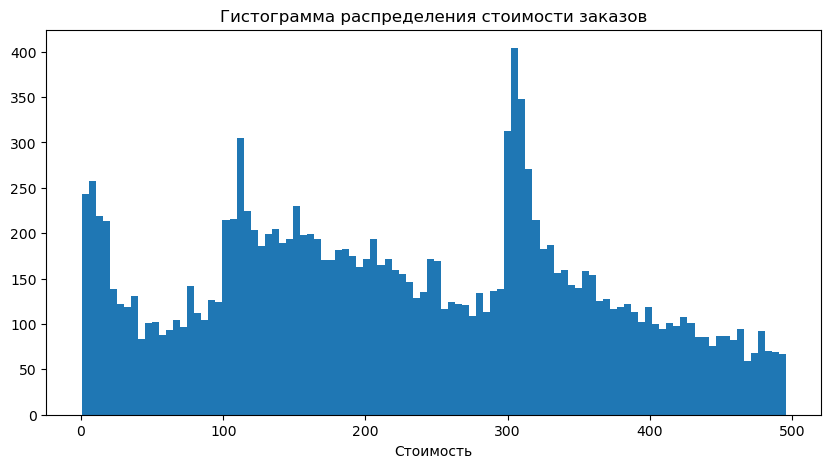

In [79]:
plt.figure(figsize = (10,5))
plt.hist(result11.Invoice_price, bins=100)
plt.title('Гистограмма распределения стоимости заказов')
plt.xlabel('Стоимость')

Распределение стоимости заказа не подчиняется стандартному закону. Наиболее популярные стоимости заказов:

- около 0 у.е. (250 заказов)
- 100 у.е. (300 заказов)
- 300 у.е. (400 заказов)

На основе данного распределения можно оценивать ожидаемую цену каждого нового заказа. Очень хорошим фактором является то, самыми частыми являются заказы около 300 у.е., что гарантирует хороший приток денежных средств.

2. С помощью гистограммы сравните количество проданных продуктов по заказам

In [80]:
query12=text(f'''

SELECT DISTINCT InvoiceNo, 
SUM(Quantity) OVER(PARTITION BY InvoiceNo) 
AS Invoice_Quantity
FROM Shop
ORDER BY Invoice_Quantity
LIMIT 8000;
''')

result12=pd.read_sql(query12, con=conn)
result12


,InvoiceNo,Invoice_Quantity
0,536521,1
1,536641,1
2,536779,1
3,536835,1
4,536866,1
...,...,...
7995,548255,115
7996,548654,115
7997,548747,115
7998,549741,115


Text(0.5, 0, 'Количество товаров')

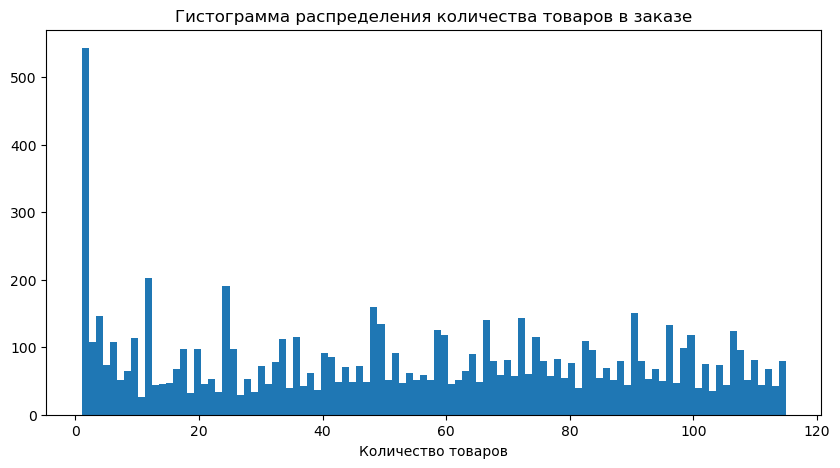

In [81]:
plt.figure(figsize = (10,5))
plt.hist(result12.Invoice_Quantity, bins=100)
plt.title('Гистограмма распределения количества товаров в заказе')
plt.xlabel('Количество товаров')

Несмотря на то, что около 500 заказов содержит всего один товар, для подавляющего большинства заказов покупки действительно являются оптовыми (количество товаров в заказе до 110).

3. Создайте scatter plot зависимости стоимости заказа от количества продуктов в заказе

In [82]:
query13=text(f'''

SELECT DISTINCT InvoiceNo, 
SUM(Quantity) OVER(PARTITION BY InvoiceNo) 
AS Invoice_Quantity,  
SUM(Quantity*UnitPrice) OVER(PARTITION BY InvoiceNo) 
AS Invoice_price
FROM Shop
LIMIT 1000;
''')

result13=pd.read_sql(query13, con=conn)
result13

,InvoiceNo,Invoice_Quantity,Invoice_price
0,536365,40,139.12
1,536366,12,22.20
2,536367,83,278.73
3,536368,15,70.05
4,536369,3,17.85
...,...,...,...
995,538640,90,145.00
996,538641,772,1485.78
997,538644,2,12.45
998,538645,230,310.74


Text(0, 0.5, 'Стоимость заказа')

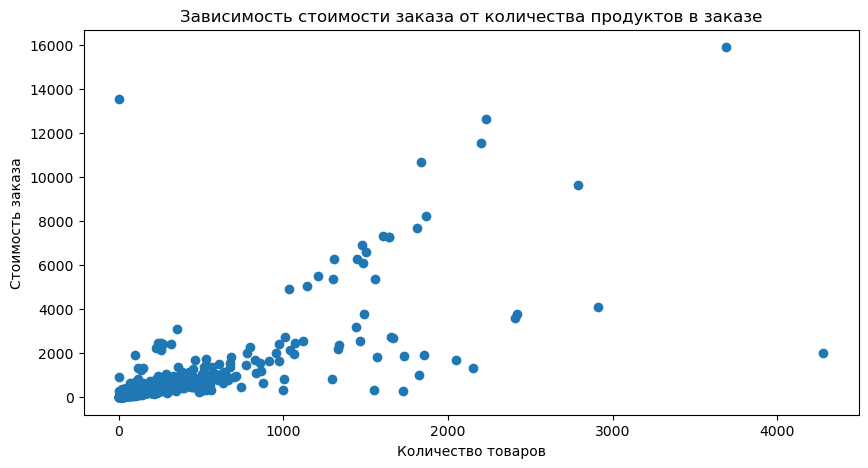

In [83]:
plt.figure(figsize = (10,5))
plt.scatter(result13.Invoice_Quantity, result13.Invoice_price)
plt.title('Зависимость стоимости заказа от количества продуктов в заказе')
plt.xlabel('Количество товаров')
plt.ylabel('Стоимость заказа')

Визуально можно выделить около 10 аномалий, для которых соотношение количества товаров и стоимости всего заказа не подчиняется линейному закону. Для остальных данных можно заметить слабую прямую корреляцию: с увеличением количества единиц товара в заказе расчёт его суммарная стоимость. 

4. Постройте line chart зависимости количества проданных продуктов от времени.

In [87]:
query14=text(f'''

SELECT strftime('%H:%M', InvoiceDate) as Time, 
SUM(Quantity) as Quantity_per_Time
FROM Shop
GROUP BY Time
ORDER BY Time;

''')

result14=pd.read_sql(query14, con=conn)
result14

,Time,Quantity_per_Time
0,06:20,1
1,07:35,1085
2,07:36,2720
3,07:37,381
4,07:38,175
...,...,...
735,20:09,785
736,20:12,315
737,20:13,275
738,20:16,115


In [88]:
hours=list(range(int(min(result14.Time)[:2]), int(max(result14.Time)[:2]), 2))
ticks=[(dt.time(i).strftime('%H:%M')) for i in hours]
ticks

['06:00', '08:00', '10:00', '12:00', '14:00', '16:00', '18:00']

Text(0, 0.5, 'Количество товаров')

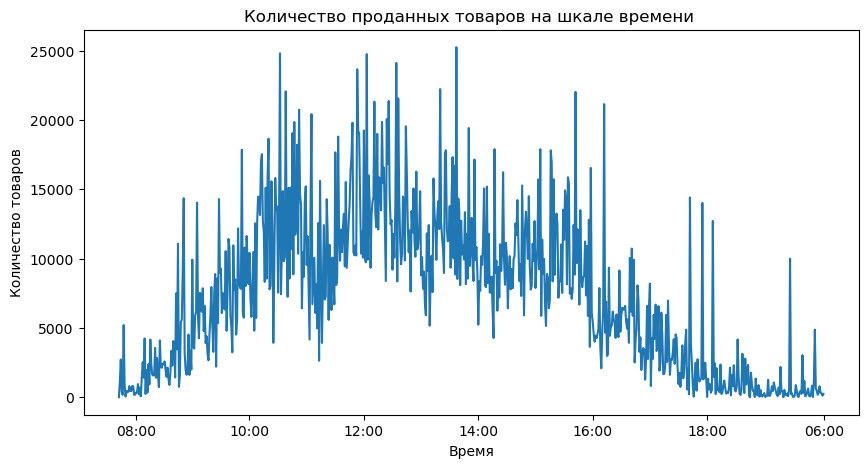

In [89]:
plt.figure(figsize = (10,5))
plt.plot(result14.Time, result14.Quantity_per_Time)
plt.title('Количество проданных товаров на шкале времени ')
plt.xlabel('Время')

plt.xticks(ticks=ticks)
plt.ylabel('Количество товаров')

Окно наибольшей покупательской активности = [11:00 , 16:00]

5. С помощью box plot сравните распределение стоимости заказов, сделанных в разные месяцы года

In [90]:
query15=text(f'''

SELECT strftime('%m', InvoiceDate) as Month, 
SUM(Quantity*UnitPrice) AS Invoice_price
FROM Shop
GROUP BY InvoiceNo
ORDER BY Invoice_price
LIMIT 19000
''')
result15=pd.read_sql(query15, con=conn )
result15

,Month,Invoice_price
0,10,0.38
1,09,0.40
2,12,0.42
3,01,0.55
4,10,0.55
...,...,...
18995,12,1631.30
18996,05,1631.61
18997,09,1632.62
18998,10,1632.63


Text(0.5, 1.0, 'Стоимость заказов по месяцам')

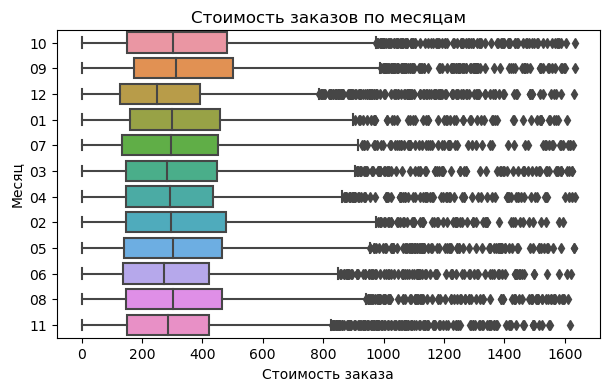

In [91]:
fig=plt.figure(figsize=(7,4))
sns.boxplot(y=result15.Month, x=result15.Invoice_price, orient='h')
plt.xlabel('Стоимость заказа')
plt.ylabel('Месяц')
plt.title('Стоимость заказов по месяцам')

Показатели продаж практически не меняются от месяца к месяцу. Медиана по каждому месяцу колеблется около 300 у.е. Q25-Q75 диапазон также стабилен

6. Создайте тепловую карту (heatmap) зависимости количества проданных продуктов от дня недели и часа дня

In [92]:
query16=text(f'''

SELECT strftime('%w', InvoiceDate) AS weekday,  
strftime('%H', InvoiceDate) AS hour, 
SUM(Quantity) AS Total_quantity
FROM Shop
GROUP BY hour, weekday
ORDER BY weekday, hour;
''')
result16=pd.read_sql(query16, con=conn )
result16

,weekday,hour,Total_quantity
0,0,09,512
1,0,10,42420
2,0,11,85560
3,0,12,93103
4,0,13,83726
...,...,...,...
69,5,16,34812
70,5,17,22622
71,5,18,25
72,5,19,110


In [93]:
result16.weekday=result16.weekday.astype('int')
result16.hour=result16.hour.astype('int')
pivot = result16.pivot_table(index = 'weekday', columns = 'hour', values = 'Total_quantity')
pivot

hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
weekday,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,512.0,42420.0,85560.0,93103.0,83726.0,59868.0,78259.0,22061.0,NaN,NaN,NaN,NaN
1,NaN,959.0,25077.0,82940.0,115329.0,93757.0,116226.0,135938.0,103049.0,85573.0,53751.0,57867.0,682.0,NaN,NaN
2,NaN,1383.0,41667.0,96987.0,134115.0,144604.0,150497.0,131258.0,102171.0,140827.0,64154.0,26175.0,5034.0,NaN,NaN
3,NaN,1685.0,24308.0,79934.0,164861.0,135311.0,157614.0,140103.0,112704.0,124071.0,59604.0,19564.0,NaN,456.0,4878.0
4,1.0,2511.0,35873.0,94827.0,169419.0,104427.0,180053.0,111711.0,118523.0,129828.0,96227.0,66284.0,60724.0,32359.0,4617.0
5,NaN,8832.0,31724.0,81790.0,112319.0,107622.0,139149.0,101014.0,100741.0,68431.0,34812.0,22622.0,25.0,110.0,13.0


Text(0.5, 1.0, 'Тепловая карта времени продаж')

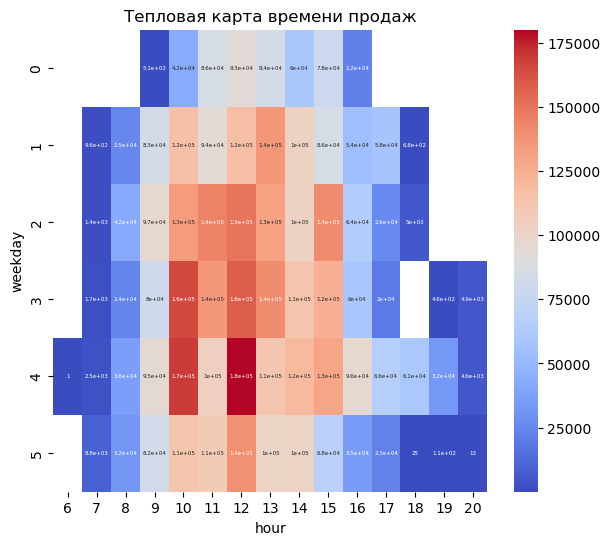

In [94]:
plt.figure(figsize=(7, 6))
sns.heatmap(data=pivot, cmap ='coolwarm', annot=True, annot_kws={"fontsize":4})
plt.title('Тепловая карта времени продаж')

Середина дня – наиболее «горячее» время для продаж. Пик активности наблюдается в рабочие дни с 10-00 до 13-00

7. Постройте bar chart, сравнивающий количество проданных продуктов, принадлежащих к разным подкатегориям

In [95]:
query17=text(f'''

SELECT DISTINCT StockCode, SUM(Quantity) AS Total_quantity
FROM Shop
GROUP BY StockCode
ORDER BY Total_quantity desc
LIMIT 100;
''')
result17=pd.read_sql(query17, con=conn )
result17

,StockCode,Total_quantity
0,22197,56898
1,84077,54951
2,85099B,48371
3,85123A,37641
4,21212,36396
...,...,...
95,22457,9119
96,22988,9073
97,82482,8986
98,22909,8976


Text(0.5, 1.0, 'Количество проданных единиц товара')

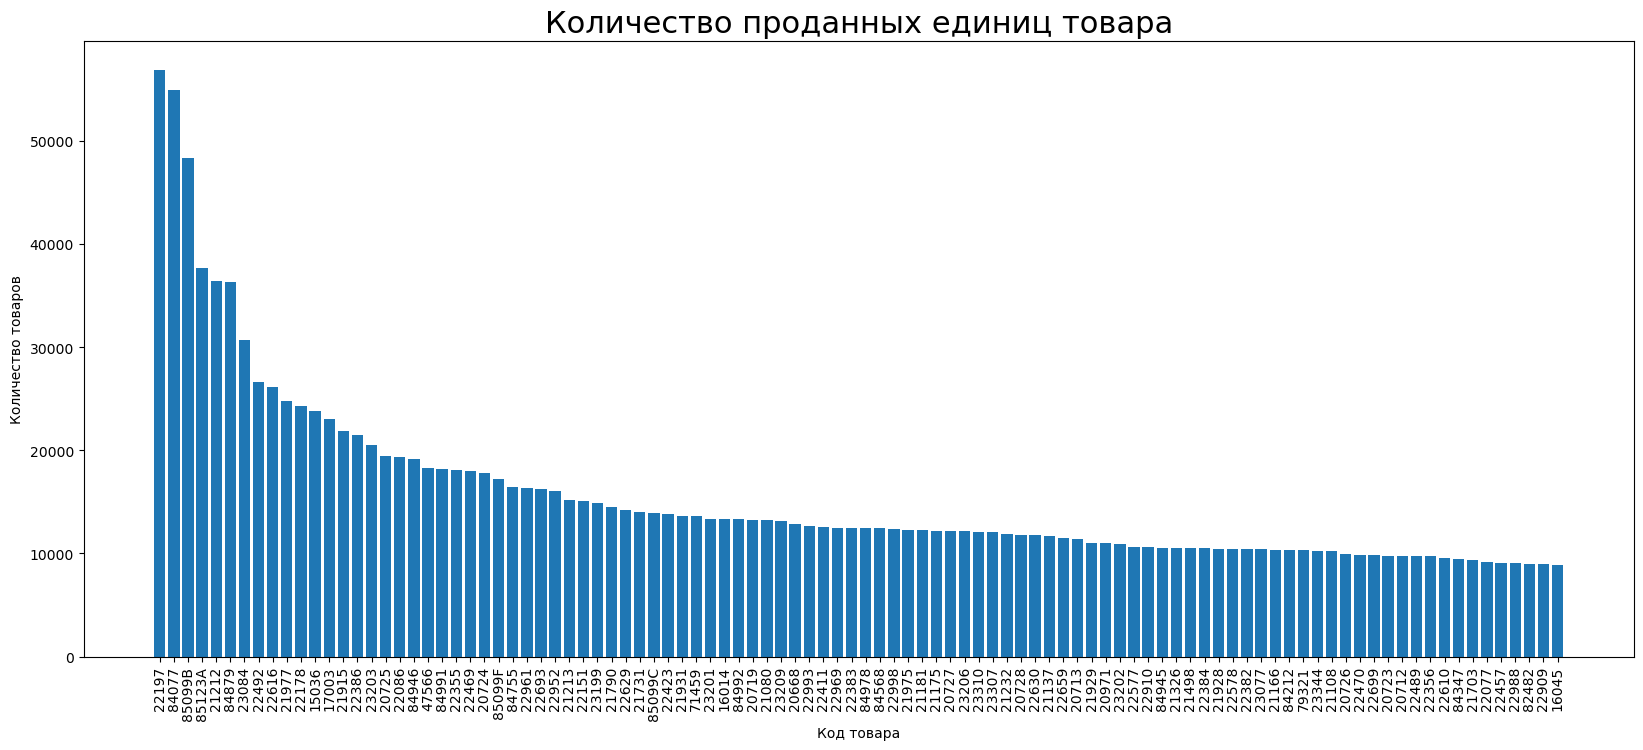

In [96]:
fig=plt.figure(figsize=(20,8))
plt.bar(x=result17.StockCode, height=result17.Total_quantity)
plt.xticks(rotation = 'vertical')
plt.xlabel('Код товара')
plt.ylabel('Количество товаров')
plt.title('Количество проданных единиц товара',  fontsize=22)

Можно выделить 3 наиболее продаваемых товара (количество проданных единиц около 50 000). В среднем товары продаются со стабильной популярностью = 15 000 единиц на наименование.

8. С помощью scatter plot визуализируйте зависимость количества проданных продуктов от цены продукта

In [97]:
query18=text(f'''

SELECT DISTINCT StockCode, SUM(Quantity) 
AS Total_quantity, UnitPrice
FROM Shop
GROUP BY StockCode
HAVING UnitPrice < 8 AND Total_quantity < 20000
ORDER BY Quantity desc
LIMIT 500;


''')
result18=pd.read_sql(query18, con=conn )
result18

,StockCode,Total_quantity,UnitPrice
0,17084R,4032,0.16
1,23167,5847,0.69
2,47556B,2600,2.55
3,17021,2391,0.24
4,23431,1449,0.72
...,...,...,...
495,72780,137,0.85
496,72598,607,0.85
497,71510,52,0.85
498,71495B,163,0.42


Text(0, 0.5, 'Цена за единицу товара')

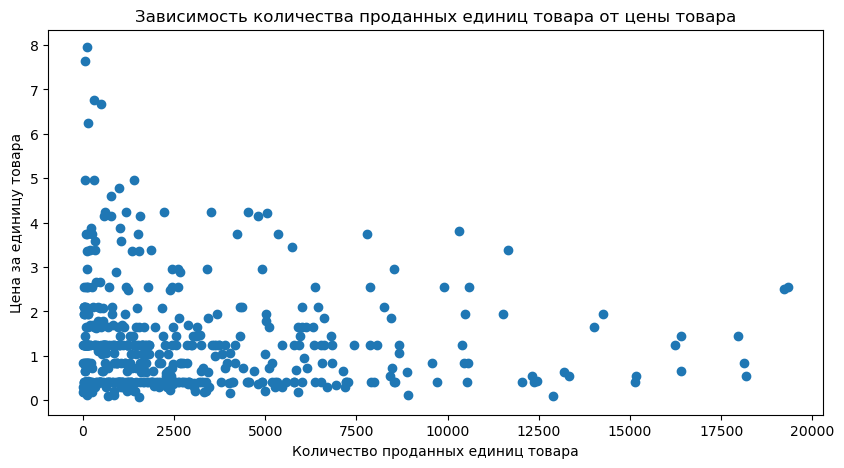

In [98]:
plt.figure(figsize = (10,5))
plt.scatter(result18.Total_quantity, result18.UnitPrice)
plt.title('Зависимость количества проданных единиц товара от цены товара')
plt.xlabel('Количество проданных единиц товара')
plt.ylabel('Цена за единицу товара')

Основная группа товаров стоит меньше 4 у.е. В диапазоне меньше 4 у.е. все товары хорошо продаются с суммарным проданным количеством до 7500 единиц.

9. Постройте bar chart, отображающий количество заказов по регионам

In [99]:
query19=text(f'''

SELECT DISTINCT Country, 
COUNT (DISTINCT InvoiceNo) AS Invoices_country
FROM Shop
GROUP BY Country
ORDER BY Invoices_country DESC
LIMIT 10;


''')
result19=pd.read_sql(query19, con=conn )
result19

,Country,Invoices_country
0,United Kingdom,18017
1,Germany,457
2,France,392
3,EIRE,288
4,Belgium,98
5,Netherlands,94
6,Spain,90
7,Portugal,58
8,Australia,57
9,Switzerland,54


Text(0.5, 1.0, 'Количество заказов по странам')

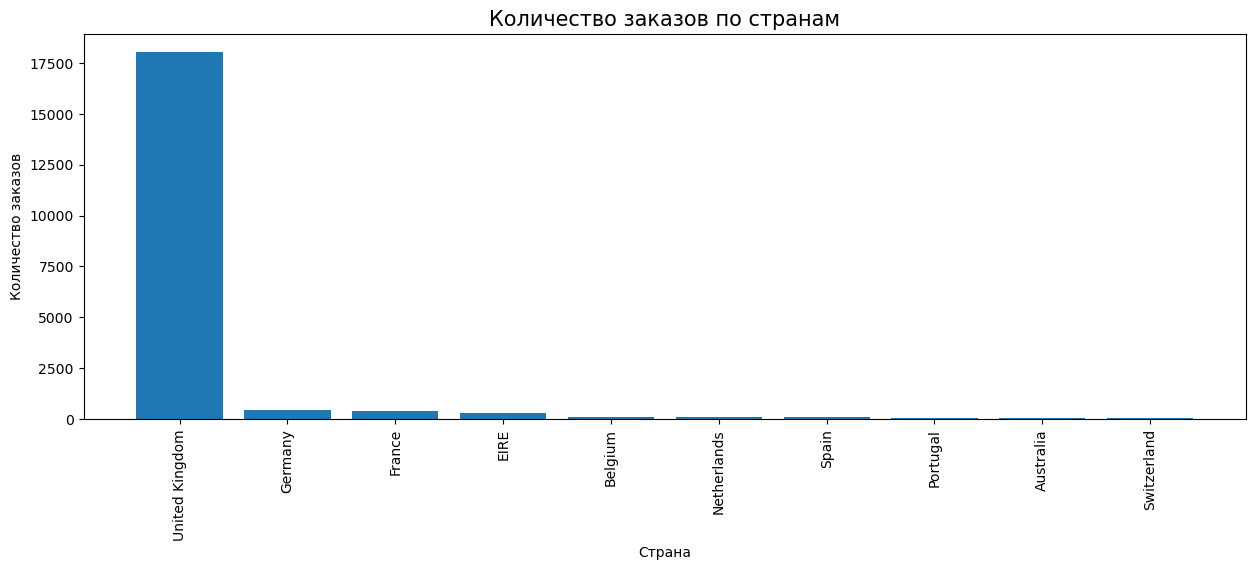

In [100]:
fig=plt.figure(figsize=(15,5))
plt.bar(x=result19.Country, height=result19.Invoices_country)
plt.xticks(rotation = 'vertical')
plt.xlabel('Страна')
plt.ylabel('Количество заказов')
plt.title('Количество заказов по странам',  fontsize=15)

Основной потребитель - the UK (90% всех заказов). Небольшой спрос наблюдается в близких европейских странах - Германии и Франции. 

10. Гистограмма количества заказов по покупателям

In [101]:
query20=text(f'''

SELECT DISTINCT CustomerID, 
COUNT (DISTINCT InvoiceNo) AS Invoices_customer
FROM Shop
GROUP BY CustomerID
HAVING CustomerID <> 0
ORDER BY Invoices_customer
LIMIT 3800;
''')

result20=pd.read_sql(query20, con=conn)
result20

,CustomerID,Invoices_customer
0,12349.0,1
1,12350.0,1
2,12353.0,1
3,12354.0,1
4,12355.0,1
...,...,...
3795,13012.0,8
3796,13093.0,8
3797,13117.0,8
3798,13126.0,8


Text(0.5, 0, 'Количество повторных заказов')

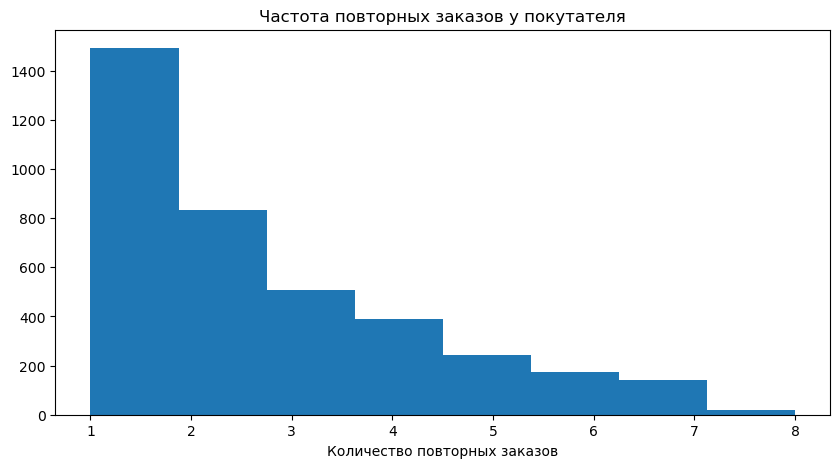

In [102]:
plt.figure(figsize = (10,5))
plt.hist(result20.Invoices_customer, bins=8)
plt.title('Частота повторных заказов у покутателя')
plt.xlabel('Количество повторных заказов')

За выбранный период, длиною в год, основная группа покупателей совершила 1-2 заказа. Количество повторных заказов уменьшается по закону, близкому к экспоненте.

## Выводы

Было получено представление о работе интернет магазина за год. 
- Магазин специализируется на покупателях из Великобритании (на эту страну приходится 90% всех заказов). География отправок широкая (от ближайших европейских стран до Австралии), но заказов из зарубежных стран крайне мало. Возможны две стратегии: полностью сконцентрироваться на внутреннем рынке или  налаживать поставки зарубеж, чтобы такие клиенты приносили больше прибыли.
- Так как большинство товаров стоит меньше 4 у.е., то для большей монетизации необходимо следить за достаточным количеством товаров в заказе (единичные заказы стоят дешёво). Возможно, необходимо изменить политику оформления заказа и качественне следить за их оптовостью.
- Понимание промежутка времени горячих продаж (будни с 11 до 13), можно выстроить работу службы поддержки, чтобы качественно оформлять заказы и взаимодействовать с покупателями. А также, следить за работой сайта в это время. Почему то, по субботам магазин не работает. Возможно, необходимо расширить персонал и дать покупателям оформлять заказы и в этот день.
- Есть слабая тенденция к повторным заказам. Возможно, необходимо продумать политику скидок для повторных клиентов.